<a href="https://colab.research.google.com/github/Tiffana/Data-Analysis-Project/blob/main/ClassificationOpinionsUsingNaiveBayes/DataAnalysis_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCRAPING DATA

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.netflix.mediaclient',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1000, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,73be725a-3507-448b-9f62-966cc1a3232a,aulia putri,https://play-lh.googleusercontent.com/a-/ALV-U...,BAGUS BANGET tapi minus nya.. - banyak film ba...,2,0,8.129.0 build 5 50801,2025-06-19 09:12:20,None,None,8.129.0 build 5 50801
1,f134fd01-4c79-4042-8f31-3b9d1c0c78ee,Dian Wulandari,https://play-lh.googleusercontent.com/a-/ALV-U...,sudah lakukan pembayaran tapi tidak bisa masuk...,1,0,9.20.0 build 8 62860,2025-06-19 06:59:55,None,None,9.20.0 build 8 62860
2,8f15bc5e-d1ef-4b37-9c37-f2025d0726e9,Amira Maulidyah,https://play-lh.googleusercontent.com/a/ACg8oc...,karena netflix menarik uang saya untuk pembaya...,2,0,None,2025-06-19 06:28:39,None,None,None
3,d69646a3-09e5-4d7e-a8f0-b10fd1f3c2e1,Ahmad Ahmad,https://play-lh.googleusercontent.com/a/ACg8oc...,ini sangat jelek karena belum mainin,1,0,None,2025-06-19 05:17:56,None,None,None
4,c38dec4d-53f0-49f6-aea9-4dac0dd9ccec,revan nanda,https://play-lh.googleusercontent.com/a/ACg8oc...,gak rekomendasi banget cuih,1,0,9.20.0 build 8 62860,2025-06-19 04:40:59,None,None,9.20.0 build 8 62860


In [ ]:
len(df_busu.index) #count the number of data we got

1000

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih


In [ ]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #get userName, rating, date-time, and reviews only

In [ ]:
my_df.head()

,userName,score,at,content
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih


In [ ]:
my_df.to_csv("data_netflix.csv", index = False)

# PREPOCESSING DATA

In [ ]:
import pandas as pd
data = pd.read_csv('data_netflix.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  1000 non-null   object
 1   score     1000 non-null   int64 
 2   at        1000 non-null   object
 3   content   1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
data.head(2)

,userName,score,at,content
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...


In [ ]:
df = pd.DataFrame(data[['userName','score','at', 'content']])
df.head(5)

,userName,score,at,content
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih


PROSES HAPUS DATA DUPLIKAT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  1000 non-null   object
 1   score     1000 non-null   int64 
 2   at        1000 non-null   object
 3   content   1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
df.drop_duplicates(subset = "content", keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  915 non-null    object
 1   score     915 non-null    int64 
 2   at        915 non-null    object
 3   content   915 non-null    object
dtypes: int64(1), object(3)
memory usage: 35.7+ KB


In [ ]:
df.head(10)

,userName,score,at,content
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih
5,Ernesto Rivaldi,1,2025-06-19 03:44:21,Aplikasi ini sangat bagus tapi tambahkan sports
6,Sakira mwrzi,1,2025-06-19 02:43:22,kenapa ga bisa daftar akun siiii ribettt bgt deh
7,Habi Nur Alief,5,2025-06-18 22:45:45,nonton apapun palinggg serruuuuu hanya disini!
8,Nella Qoulia,1,2025-06-18 15:17:24,"Netflix sudah download,suruh ketik no hp atau ..."
9,SNES_ID,1,2025-06-18 14:09:40,"apk jelek, mau login pun susah amat"


WORDCLOUD SEBELUM PREPROCESSING

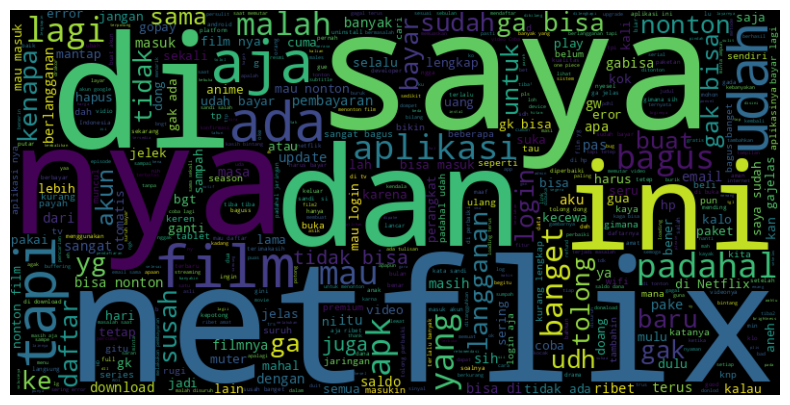

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#mengisi nilai dengan NaN dengan string kosong('')
df['content'] = df['content'].fillna('')

#menggabungkan teks dari kolom 'content'
text = ' '.join(df['content'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
wc.generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

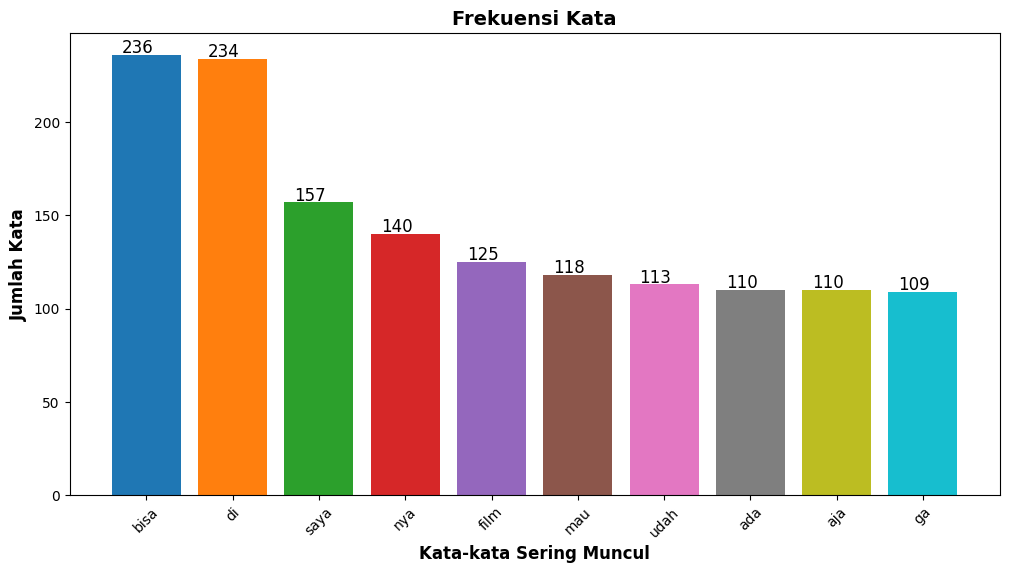

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["content"])
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

#definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

#menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), ha='center', color= 'black' , fontsize=12)
plt.show()

PROSES CLEANING

In [ ]:
import re
import string
import nltk

# fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbol & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F97F"  # geometric shapes extended
            u"\U0001F800-\U0001F8FF"   # supplemental arrows-C
            u"\U0001F900-\U0001F9FF"   # supplemental symbols and pictographs
            u"\U0001FA00-\U0001FA6F"   # chess symbols
            u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
            u"\U0001F004-\U0001F0CF"   # additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
        return tweet

# fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
        return tweet

df['cleaning'] = df['content'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(15)


,userName,score,at,content,cleaning
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,BAGUS BANGET tapi minus nya banyak film bagus...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,gak rekomendasi banget cuih
5,Ernesto Rivaldi,1,2025-06-19 03:44:21,Aplikasi ini sangat bagus tapi tambahkan sports,Aplikasi ini sangat bagus tapi tambahkan sports
6,Sakira mwrzi,1,2025-06-19 02:43:22,kenapa ga bisa daftar akun siiii ribettt bgt deh,kenapa ga bisa daftar akun siiii ribettt bgt deh
7,Habi Nur Alief,5,2025-06-18 22:45:45,nonton apapun palinggg serruuuuu hanya disini!,nonton apapun palinggg serruuuuu hanya disini
8,Nella Qoulia,1,2025-06-18 15:17:24,"Netflix sudah download,suruh ketik no hp atau ...",Netflix sudah downloadsuruh ketik no hp atau e...
9,SNES_ID,1,2025-06-18 14:09:40,"apk jelek, mau login pun susah amat",apk jelek mau login pun susah amat


PROSES CASE FOLDING

In [ ]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else:
        return text


df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,userName,score,at,content,cleaning,case_folding
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,BAGUS BANGET tapi minus nya banyak film bagus...,bagus banget tapi minus nya banyak film bagus...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,gak rekomendasi banget cuih,gak rekomendasi banget cuih


NORMALISASI KATA

In [ ]:
import pandas as pd

#fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)  # atau '<karakter eksplisit>'
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
    else:
        return '', [], [], []

In [ ]:
kamus = {'gk': 'tidak', 'bgt': 'banget'}
replace_taboo_words("gk ngerti bgt lah", kamus)

('tidak ngerti banget lah',
 ['tidak', 'banget'],
 ['gk', 'bgt'],
 [-871262263992448227, -7347957027684288490])

**download kamuskatabaku.xlsx dari Mydrive/Colab Notebooks**[link text](https://docs.google.com/spreadsheets/d/1W8ajWI6w1AeijXTUA-Jni8HwlFXOv0yo/edit?usp=sharing&ouid=102220997434099629685&rtpof=true&sd=true)

In [ ]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
#baca dataset
data = pd.DataFrame(df[['userName','score','at', 'content','cleaning','case_folding']])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 998
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      915 non-null    object
 1   score         915 non-null    int64 
 2   at            915 non-null    object
 3   content       915 non-null    object
 4   cleaning      915 non-null    object
 5   case_folding  915 non-null    object
dtypes: int64(1), object(5)
memory usage: 82.3+ KB


,userName,score,at,content,cleaning,case_folding
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,BAGUS BANGET tapi minus nya banyak film bagus...,bagus banget tapi minus nya banyak film bagus...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,gak rekomendasi banget cuih,gak rekomendasi banget cuih


In [ ]:
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda text: replace_taboo_words(text, kamus_tidak_baku)))

df = pd.DataFrame(data[['userName','score','at','content','cleaning','case_folding','normalisasi']])
df.head(20)


,userName,score,at,content,cleaning,case_folding,normalisasi
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,BAGUS BANGET tapi minus nya banyak film bagus...,bagus banget tapi minus nya banyak film bagus...,bagus banget tapi minus ya banyak film bagus y...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,gak rekomendasi banget cuih,gak rekomendasi banget cuih,tidak rekomendasi banget cuih
5,Ernesto Rivaldi,1,2025-06-19 03:44:21,Aplikasi ini sangat bagus tapi tambahkan sports,Aplikasi ini sangat bagus tapi tambahkan sports,aplikasi ini sangat bagus tapi tambahkan sports,aplikasi ini sangat bagus tapi tambahkan sports
6,Sakira mwrzi,1,2025-06-19 02:43:22,kenapa ga bisa daftar akun siiii ribettt bgt deh,kenapa ga bisa daftar akun siiii ribettt bgt deh,kenapa ga bisa daftar akun siiii ribettt bgt deh,kenapa tidak bisa daftar akun siiii ribettt ba...
7,Habi Nur Alief,5,2025-06-18 22:45:45,nonton apapun palinggg serruuuuu hanya disini!,nonton apapun palinggg serruuuuu hanya disini,nonton apapun palinggg serruuuuu hanya disini,menonton apapun palinggg serruuuuu hanya disini
8,Nella Qoulia,1,2025-06-18 15:17:24,"Netflix sudah download,suruh ketik no hp atau ...",Netflix sudah downloadsuruh ketik no hp atau e...,netflix sudah downloadsuruh ketik no hp atau e...,netflix sudah downloadsuruh ketik no hp atau e...
9,SNES_ID,1,2025-06-18 14:09:40,"apk jelek, mau login pun susah amat",apk jelek mau login pun susah amat,apk jelek mau login pun susah amat,apk jelek mau login pun susah amat


TOKENIZATION

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(5)

,userName,score,at,content,cleaning,case_folding,normalisasi,tokenize
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,BAGUS BANGET tapi minus nya banyak film bagus...,bagus banget tapi minus nya banyak film bagus...,bagus banget tapi minus ya banyak film bagus y...,"[bagus, banget, tapi, minus, ya, banyak, film,..."
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,"[sudah, lakukan, pembayaran, tapi, tidak, bisa..."
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,"[karena, netflix, menarik, uang, saya, untuk, ..."
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,"[ini, sangat, jelek, karena, belum, mainin]"
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,gak rekomendasi banget cuih,gak rekomendasi banget cuih,tidak rekomendasi banget cuih,"[tidak, rekomendasi, banget, cuih]"


PROSES STOPWORD REMOVAL

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x : remove_stopwords(x))
df.head(5)

,userName,score,at,content,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,BAGUS BANGET tapi minus nya banyak film bagus...,bagus banget tapi minus nya banyak film bagus...,bagus banget tapi minus ya banyak film bagus y...,"[bagus, banget, tapi, minus, ya, banyak, film,...","[bagus, banget, minus, ya, film, bagus, muncul..."
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,"[sudah, lakukan, pembayaran, tapi, tidak, bisa...","[lakukan, pembayaran, masuk, arahkan, salin, l..."
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,"[karena, netflix, menarik, uang, saya, untuk, ...","[netflix, menarik, uang, pembayaran]"
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,"[ini, sangat, jelek, karena, belum, mainin]","[jelek, mainin]"
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,gak rekomendasi banget cuih,gak rekomendasi banget cuih,tidak rekomendasi banget cuih,"[tidak, rekomendasi, banget, cuih]","[rekomendasi, banget, cuih]"


PROSES STEMING DATA

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text (text):
  return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,userName,score,at,content,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,BAGUS BANGET tapi minus nya banyak film bagus...,bagus banget tapi minus nya banyak film bagus...,bagus banget tapi minus ya banyak film bagus y...,"[bagus, banget, tapi, minus, ya, banyak, film,...","[bagus, banget, minus, ya, film, bagus, muncul...",bagus banget minus ya film bagus muncul gabung...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,"[sudah, lakukan, pembayaran, tapi, tidak, bisa...","[lakukan, pembayaran, masuk, arahkan, salin, l...",laku bayar masuk arah salin link muter muter l...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,"[karena, netflix, menarik, uang, saya, untuk, ...","[netflix, menarik, uang, pembayaran]",netflix tarik uang bayar
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,"[ini, sangat, jelek, karena, belum, mainin]","[jelek, mainin]",jelek mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,gak rekomendasi banget cuih,gak rekomendasi banget cuih,tidak rekomendasi banget cuih,"[tidak, rekomendasi, banget, cuih]","[rekomendasi, banget, cuih]",rekomendasi banget cuih


PROSES HAPUS DATA BERNILAI KOSONG (NAN)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userName          915 non-null    object
 1   score             915 non-null    int64 
 2   at                915 non-null    object
 3   content           915 non-null    object
 4   cleaning          915 non-null    object
 5   case_folding      915 non-null    object
 6   normalisasi       915 non-null    object
 7   tokenize          915 non-null    object
 8   stopword removal  915 non-null    object
 9   steming_data      915 non-null    object
dtypes: int64(1), object(9)
memory usage: 110.9+ KB


In [ ]:
data = df.dropna()

In [ ]:
data.head()

,userName,score,at,content,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,BAGUS BANGET tapi minus nya banyak film bagus...,bagus banget tapi minus nya banyak film bagus...,bagus banget tapi minus ya banyak film bagus y...,"[bagus, banget, tapi, minus, ya, banyak, film,...","[bagus, banget, minus, ya, film, bagus, muncul...",bagus banget minus ya film bagus muncul gabung...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,sudah lakukan pembayaran tapi tidak bisa masuk...,"[sudah, lakukan, pembayaran, tapi, tidak, bisa...","[lakukan, pembayaran, masuk, arahkan, salin, l...",laku bayar masuk arah salin link muter muter l...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,karena netflix menarik uang saya untuk pembaya...,"[karena, netflix, menarik, uang, saya, untuk, ...","[netflix, menarik, uang, pembayaran]",netflix tarik uang bayar
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,ini sangat jelek karena belum mainin,"[ini, sangat, jelek, karena, belum, mainin]","[jelek, mainin]",jelek mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,gak rekomendasi banget cuih,gak rekomendasi banget cuih,tidak rekomendasi banget cuih,"[tidak, rekomendasi, banget, cuih]","[rekomendasi, banget, cuih]",rekomendasi banget cuih


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userName          915 non-null    object
 1   score             915 non-null    int64 
 2   at                915 non-null    object
 3   content           915 non-null    object
 4   cleaning          915 non-null    object
 5   case_folding      915 non-null    object
 6   normalisasi       915 non-null    object
 7   tokenize          915 non-null    object
 8   stopword removal  915 non-null    object
 9   steming_data      915 non-null    object
dtypes: int64(1), object(9)
memory usage: 110.9+ KB


WORDCLOUD SETELAH PREPROCESSING

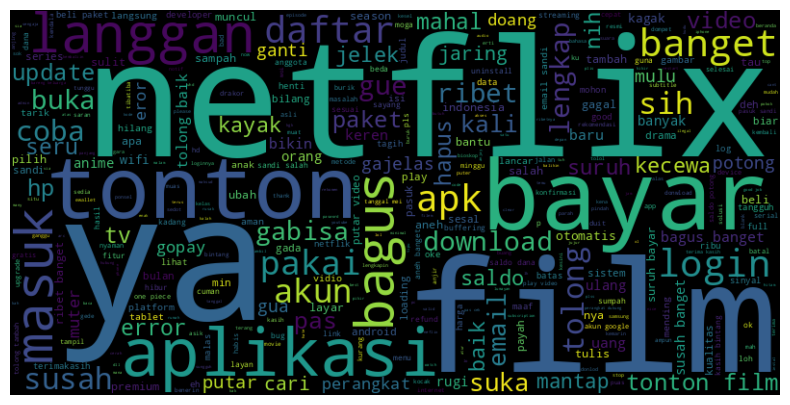

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#mengisi nilai NaN dengan string kosong ('')
#data['steming_data'] = data['steming_data'].fillna('')

#menggabungkan teks dari kolom 'content'
text = ' '.join(data['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
wc.generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

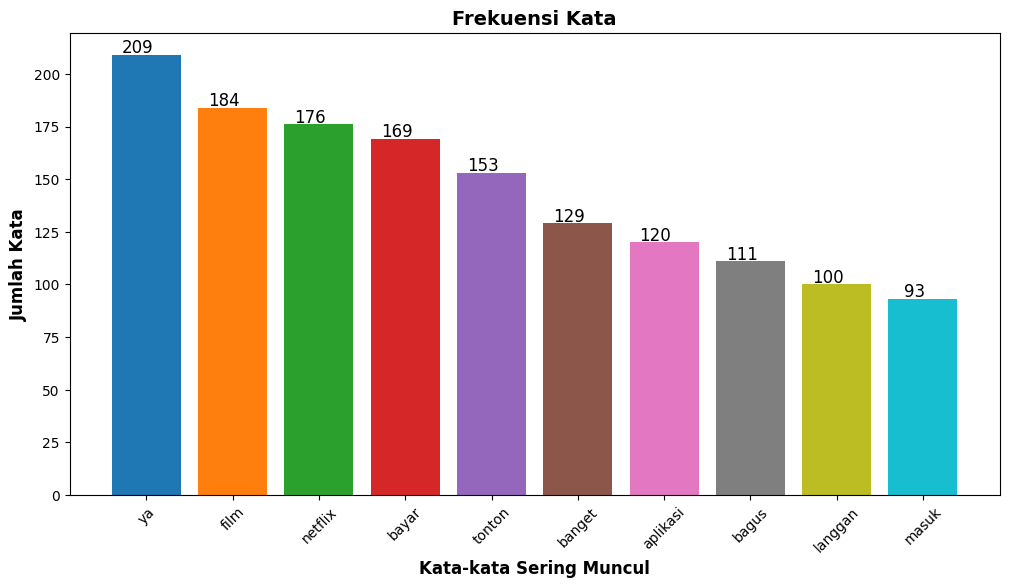

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data["steming_data"])
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

#definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

#menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), ha='center', color= 'black' , fontsize=12)
plt.show()

In [ ]:
data.to_csv('Hasil_Preprocessing_data.csv',encoding='utf8', index=False);

# PELABELAN DATA

In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_Preprocessing_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userName          915 non-null    object
 1   score             915 non-null    int64 
 2   at                915 non-null    object
 3   content           915 non-null    object
 4   cleaning          909 non-null    object
 5   case_folding      909 non-null    object
 6   normalisasi       909 non-null    object
 7   tokenize          915 non-null    object
 8   stopword removal  915 non-null    object
 9   steming_data      904 non-null    object
dtypes: int64(1), object(9)
memory usage: 71.6+ KB


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 914
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userName          904 non-null    object
 1   score             904 non-null    int64 
 2   at                904 non-null    object
 3   content           904 non-null    object
 4   cleaning          904 non-null    object
 5   case_folding      904 non-null    object
 6   normalisasi       904 non-null    object
 7   tokenize          904 non-null    object
 8   stopword removal  904 non-null    object
 9   steming_data      904 non-null    object
dtypes: int64(1), object(9)
memory usage: 77.7+ KB


In [ ]:
data = pd.DataFrame(data[['userName','score','at','content','steming_data']])
data.head(5)

,userName,score,at,content,steming_data
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,bagus banget minus ya film bagus muncul gabung...
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,laku bayar masuk arah salin link muter muter l...
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,netflix tarik uang bayar
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,jelek mainin
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,rekomendasi banget cuih


In [ ]:
import pandas as pd
import requests

#unduh kamus lexicon positif dan negatif dari github
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep='\t', header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep='\t', header=None)[0])

#fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
  if isinstance(text, str):
      positive_count = sum(1 for word in text.split() if word in positive_lexicon)
      negative_count = sum(1 for word in text.split() if word in negative_lexicon)
      sentiment_score = positive_count - negative_count
      if sentiment_score > 0:
          sentiment = "Positif"
      elif sentiment_score < 0:
          sentiment = "Negatif"
      else:
          sentiment = "Netral"
      return sentiment_score, sentiment
  return 0,"Netral"

#tentukan sentimen dan skor untuk setiap ulasan
data[['rating', 'sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))
data.head(5)

,userName,score,at,content,steming_data,rating,sentiment
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,bagus banget minus ya film bagus muncul gabung...,-2,Negatif
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,laku bayar masuk arah salin link muter muter l...,1,Positif
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,netflix tarik uang bayar,1,Positif
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,jelek mainin,-2,Negatif
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,rekomendasi banget cuih,1,Positif


/tmp/ipython-input-71-1056585321.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


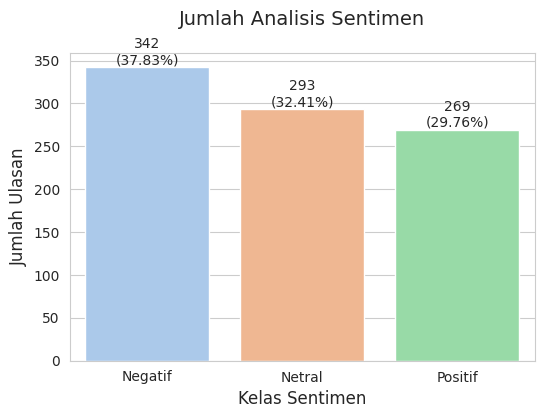

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Kelas Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

total = len(data['sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha= 'center', va= 'bottom')
plt.show()

In [ ]:
data.to_csv('Hasil_labeling_data.csv',encoding='utf8', index=False)

In [ ]:
#ekspor ke file CSV terpisah berdasarkan label sentimen
for sentiment_label in ['Positif', 'Negatif', 'Netral']:
  #filter data sesuai dengan label sentimen
  filtered_data = data[data['sentiment'] == sentiment_label]

  #tentukan nama file berdasarkan label sentimen
  filename = f"{sentiment_label}_dataset.csv"

  #ekspor data yang telah difilter ke file CSV
  filtered_data.to_csv(filename, index=False)

# SPLITTING DATASET

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_labeling_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      904 non-null    object
 1   score         904 non-null    int64 
 2   at            904 non-null    object
 3   content       904 non-null    object
 4   steming_data  904 non-null    object
 5   rating        904 non-null    int64 
 6   sentiment     904 non-null    object
dtypes: int64(2), object(5)
memory usage: 49.6+ KB


In [ ]:
df = data.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      904 non-null    object
 1   score         904 non-null    int64 
 2   at            904 non-null    object
 3   content       904 non-null    object
 4   steming_data  904 non-null    object
 5   rating        904 non-null    int64 
 6   sentiment     904 non-null    object
dtypes: int64(2), object(5)
memory usage: 49.6+ KB


In [ ]:
print(df.columns)

Index(['userName', 'score', 'at', 'content', 'steming_data', 'rating',
       'sentiment'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'],df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
#simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [ ]:
#simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [ ]:
#menampilkan informasi jumlah kata
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 723
Jumlah Data Uji: 181


**buka hasil di code cell output action/view output fullscreen**

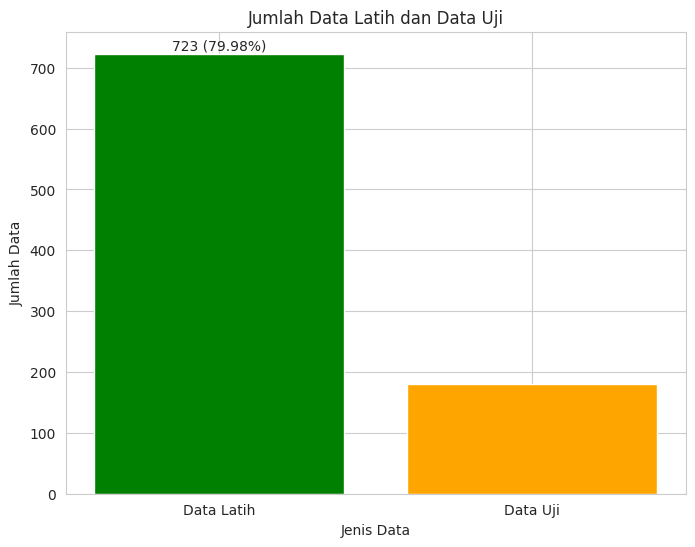

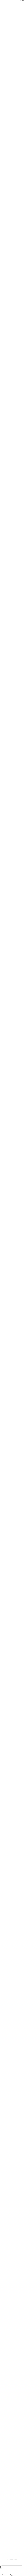

In [ ]:
import matplotlib.pyplot as plt

#jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

#membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['green', 'orange'])

#menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)', ha='center', va='bottom')

  plt.title('Jumlah Data Latih dan Data Uji')
  plt.xlabel('Jenis Data')
  plt.ylabel('Jumlah Data')

  plt.show()

# NAIVE BAYES CLASSIFIER

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      904 non-null    object
 1   score         904 non-null    int64 
 2   at            904 non-null    object
 3   content       904 non-null    object
 4   steming_data  904 non-null    object
 5   rating        904 non-null    int64 
 6   sentiment     904 non-null    object
dtypes: int64(2), object(5)
memory usage: 49.6+ KB


In [ ]:
df.head()

,userName,score,at,content,steming_data,rating,sentiment
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,bagus banget minus ya film bagus muncul gabung...,-2,Negatif
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,laku bayar masuk arah salin link muter muter l...,1,Positif
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,netflix tarik uang bayar,1,Positif
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,jelek mainin,-2,Negatif
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,rekomendasi banget cuih,1,Positif


TRANSFORMASI TEKS MENJADI MATRIKS FREKUENSI TOKEN MENGHITUNG PROBABILITAS PRIOR (p(c)P(C))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

#inisialisasi CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['steming_data'])
features = vectorizer.get_feature_names_out()
df_tokens = pd.DataFrame(X.toarray(), columns=features)
df_combined = pd.concat([df_tokens, df['sentiment']], axis=1)

#menghitung frekuensi token untuk setiap sentimen
frequency_positive = df_combined[df_combined['sentiment'] == 'Positif'].drop('sentiment', axis=1).sum()
frequency_negative = df_combined[df_combined['sentiment'] == 'Negatif'].drop('sentiment', axis=1).sum()
frequency_neutral = df_combined[df_combined['sentiment'] == 'Netral'].drop('sentiment', axis=1).sum()

#menghitung probabilitas prior
sentiment_counts = df['sentiment'].value_counts()
total_samples = len(df)
prior_probabilities = sentiment_counts / total_samples

print("Prior Probabilities:")
print(prior_probabilities)

Prior Probabilities:
sentiment
Negatif    0.378319
Netral     0.324115
Positif    0.297566
Name: count, dtype: float64


MWNGHITUNG PROBABILITAS KONDISIONAL (p(wi|C)P(WI|C))

In [ ]:
# menghitung probabilitas kondisional untuk setiap token dan sentimen dengan smooting Laplace

total_positive = frequency_positive.sum()
total_negative = frequency_negative.sum()
total_neutral = frequency_neutral.sum()
probability_conditional_positive = (frequency_positive + 1) / (total_positive + len(features))
probability_conditional_negative = (frequency_negative + 1) / (total_negative + len(features))
probability_conditional_neutral = (frequency_neutral + 1) / (total_neutral + len(features))

print("Probability Conditional Positive:")
print(probability_conditional_positive)
print("\nProbability Conditional Negative:")
print(probability_conditional_negative)
print("\nProbability Conditional Neutral:")
print(probability_conditional_neutral)

Probability Conditional Positive:
acara                  0.000529
account                0.000264
ace                    0.000264
acount                 0.000264
action                 0.000264
                         ...   
yugioh                 0.000529
yukkkkkkkkkkkkkkkkk    0.000264
yyaa                   0.000264
zellweger              0.000264
zona                   0.000264
Length: 1698, dtype: float64

Probability Conditional Negative:
acara                  0.000218
account                0.000218
ace                    0.000218
acount                 0.000218
action                 0.000218
                         ...   
yugioh                 0.000218
yukkkkkkkkkkkkkkkkk    0.000218
yyaa                   0.000218
zellweger              0.000218
zona                   0.000218
Length: 1698, dtype: float64

Probability Conditional Neutral:
acara                  0.000605
account                0.000908
ace                    0.000605
acount                 0.000605
action 

MENGHITUNG PROBABILITAS POSTERIOR (p(c|w)P(C|W)) UNTUK SETIAP DOKUMEN

In [ ]:
#menghitung probabilitas posterior untuk setiap dokumen
def calculate_posterior_probabilities(document):
  words = document.split()
  posterior_positive = prior_probabilities['Positif']
  posterior_negative = prior_probabilities['Negatif']
  posterior_neutral = prior_probabilities['Netral']

  for word in words:
    if word in features:
      posterior_positive *= probability_conditional_positive[word]
      posterior_negative *= probability_conditional_negative[word]
      posterior_neutral *= probability_conditional_neutral[word]
      return {'Positif': posterior_positive, 'Negatif': posterior_negative, 'Netral': posterior_neutral}

df['posterior_probabilities'] = df['steming_data'].apply(calculate_posterior_probabilities)
df.head()

,userName,score,at,content,steming_data,rating,sentiment,posterior_probabilities
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,bagus banget minus ya film bagus muncul gabung...,-2,Negatif,"{'Positif': 0.0034619038482237704, 'Negatif': ..."
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,laku bayar masuk arah salin link muter muter l...,1,Positif,"{'Positif': 0.0001573592658283532, 'Negatif': ..."
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,netflix tarik uang bayar,1,Positif,"{'Positif': 0.0047994576077647726, 'Negatif': ..."
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,jelek mainin,-2,Negatif,"{'Positif': 7.86796329141766e-05, 'Negatif': 0..."
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,rekomendasi banget cuih,1,Positif,"{'Positif': 0.00023603889874252983, 'Negatif':..."


# NAIVE BAYES GAUSSIAN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   userName                 904 non-null    object
 1   score                    904 non-null    int64 
 2   at                       904 non-null    object
 3   content                  904 non-null    object
 4   steming_data             904 non-null    object
 5   rating                   904 non-null    int64 
 6   sentiment                904 non-null    object
 7   posterior_probabilities  904 non-null    object
dtypes: int64(2), object(6)
memory usage: 56.6+ KB


In [ ]:
df.head()

,userName,score,at,content,steming_data,rating,sentiment,posterior_probabilities
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,bagus banget minus ya film bagus muncul gabung...,-2,Negatif,"{'Positif': 0.0034619038482237704, 'Negatif': ..."
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,laku bayar masuk arah salin link muter muter l...,1,Positif,"{'Positif': 0.0001573592658283532, 'Negatif': ..."
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,netflix tarik uang bayar,1,Positif,"{'Positif': 0.0047994576077647726, 'Negatif': ..."
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,jelek mainin,-2,Negatif,"{'Positif': 7.86796329141766e-05, 'Negatif': 0..."
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,rekomendasi banget cuih,1,Positif,"{'Positif': 0.00023603889874252983, 'Negatif':..."


GaussianNB Results
Confusion Matrix (GaussianNB):
[[15 37 13]
 [11 27 22]
 [ 9 13 34]]

Classification Report (GaussianNB):
              precision    recall  f1-score   support

     Negatif       0.43      0.23      0.30        65
      Netral       0.35      0.45      0.39        60
     Positif       0.49      0.61      0.54        56

    accuracy                           0.42       181
   macro avg       0.42      0.43      0.41       181
weighted avg       0.42      0.42      0.41       181


Accuracy Score (GaussianNB):
Accuracy (GaussianNB): 0.4199


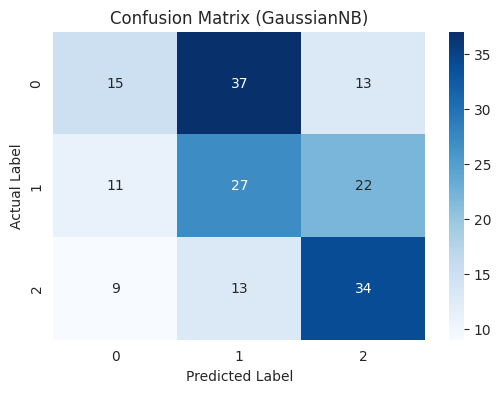

Actual Label vs Predicted Label (GaussianNB):


,steming_data,Actual Label,Predicted Label
70,tonton netflix daftar ya bayar dulunyesel gua ...,Positif,Positif
457,fil ya bagus,Positif,Positif
218,oke,Positif,Netral
250,tolong aplikasi ya baik log susah banget muter...,Negatif,Negatif
39,masak aplikasi buka,Negatif,Netral


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['steming_data']).toarray()
y = df['sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train model GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#predict with GaussianNB
y_pred_gnb = gnb.predict(X_test)

#evaluate GaussianNB
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print("GaussianNB Results")
print("===================")
print("Confusion Matrix (GaussianNB):")
print(conf_matrix_gnb)
print("===================================")
print("\nClassification Report (GaussianNB):")
print(class_report_gnb)
print("===================================")
print("\nAccuracy Score (GaussianNB):")
print(f"Accuracy (GaussianNB): {accuracy_gnb:.4f}")
print("===================================")

#plot confusion matrix for GaussianNB
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (GaussianNB)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#create DataFrame for actual vs predicted (GaussianNB)
results_gnb = pd.DataFrame({'steming_data': df.loc[y_test.index, 'steming_data'], 'Actual Label': y_test, 'Predicted Label': y_pred_gnb})
results_gnb.to_csv('Hasil_prediksi_GaussianNB.csv',encoding='utf8', index=False)
print("Actual Label vs Predicted Label (GaussianNB):")
results_gnb.head()

# NAIVE BAYES MULTINOMIAL

MultinomialNB Results
Confusion Matrix (MultinomialNB):
[[60  4  1]
 [33 17 10]
 [14 11 31]]

Classification Report (MultinomialNB):
              precision    recall  f1-score   support

     Negatif       0.56      0.92      0.70        65
      Netral       0.53      0.28      0.37        60
     Positif       0.74      0.55      0.63        56

    accuracy                           0.60       181
   macro avg       0.61      0.59      0.57       181
weighted avg       0.61      0.60      0.57       181


Accuracy Score (MultinomialNB):
Accuracy (MultinomialNB): 0.5967


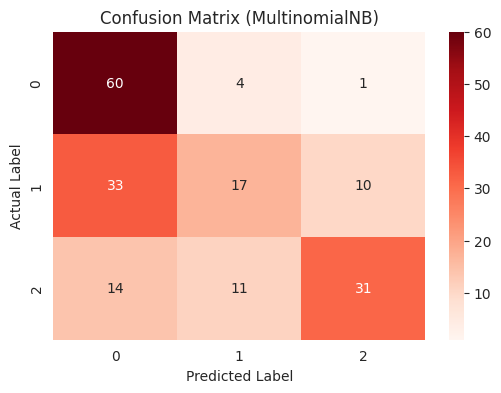

Actual Label vs Predicted Label (MultinomialNB):


,steming_data,Actual Label,Predicted Label
70,tonton netflix daftar ya bayar dulunyesel gua ...,Positif,Negatif
457,fil ya bagus,Positif,Netral
218,oke,Positif,Positif
250,tolong aplikasi ya baik log susah banget muter...,Negatif,Negatif
39,masak aplikasi buka,Negatif,Negatif


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['steming_data']).toarray()
y = df['sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train model GaussianNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

#predict with GaussianNB
y_pred_mnb = mnb.predict(X_test)

#evaluate MultinomialNB
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
class_report_mnb = classification_report(y_test, y_pred_mnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

print("MultinomialNB Results")
print("===================")
print("Confusion Matrix (MultinomialNB):")
print(conf_matrix_mnb)
print("===================================")
print("\nClassification Report (MultinomialNB):")
print(class_report_mnb)
print("===================================")
print("\nAccuracy Score (MultinomialNB):")
print(f"Accuracy (MultinomialNB): {accuracy_mnb:.4f}")
print("===================================")

#plot confusion matrix for MultinomialNB
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (MultinomialNB)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#create DataFrame for actual vs predicted (MultinomialNB)
results_mnb = pd.DataFrame({'steming_data': df.loc[y_test.index, 'steming_data'], 'Actual Label': y_test, 'Predicted Label': y_pred_mnb})
results_mnb.to_csv('Hasil_prediksi_MultinomialNB.csv',encoding='utf8', index=False)
print("Actual Label vs Predicted Label (MultinomialNB):")
results_mnb.head()

# NAIVE BAYES BERNOULLI

BernoulliNB Results
Confusion Matrix (BernoulliNB):
[[47 17  1]
 [14 40  6]
 [ 8 29 19]]

Classification Report (BernoulliNB):
              precision    recall  f1-score   support

     Negatif       0.68      0.72      0.70        65
      Netral       0.47      0.67      0.55        60
     Positif       0.73      0.34      0.46        56

    accuracy                           0.59       181
   macro avg       0.63      0.58      0.57       181
weighted avg       0.62      0.59      0.58       181


Accuracy Score (BernoulliNB):
Accuracy (BernoulliNB): 0.5856


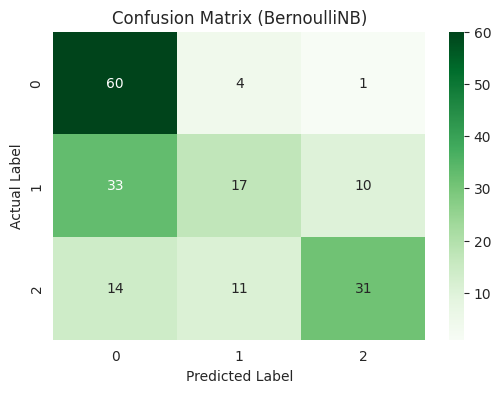

Actual Label vs Predicted Label (BernoulliNB):


,steming_data,Actual Label,Predicted Label
70,tonton netflix daftar ya bayar dulunyesel gua ...,Positif,Negatif
457,fil ya bagus,Positif,Netral
218,oke,Positif,Netral
250,tolong aplikasi ya baik log susah banget muter...,Negatif,Negatif
39,masak aplikasi buka,Negatif,Netral


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['steming_data']).toarray()
y = df['sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train model BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

#predict with BernoulliNB
y_pred_bnb = bnb.predict(X_test)

#evaluate BernoulliNB
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
class_report_bnb = classification_report(y_test, y_pred_bnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

print("BernoulliNB Results")
print("===================")
print("Confusion Matrix (BernoulliNB):")
print(conf_matrix_bnb)
print("===================================")
print("\nClassification Report (BernoulliNB):")
print(class_report_bnb)
print("===================================")
print("\nAccuracy Score (BernoulliNB):")
print(f"Accuracy (BernoulliNB): {accuracy_bnb:.4f}")
print("===================================")

#plot confusion matrix for BernoulliNB
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (BernoulliNB)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#create DataFrame for actual vs predicted (BernoulliNB)
results_bnb = pd.DataFrame({'steming_data': df.loc[y_test.index, 'steming_data'], 'Actual Label': y_test, 'Predicted Label': y_pred_bnb})
results_bnb.to_csv('Hasil_prediksi_BernoulliNB.csv',encoding='utf8', index=False)
print("Actual Label vs Predicted Label (BernoulliNB):")
results_bnb.head()

# WORDCLOUD

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_labeling_data.csv")
data.head()

,userName,score,at,content,steming_data,rating,sentiment
0,aulia putri,2,2025-06-19 09:12:20,BAGUS BANGET tapi minus nya.. - banyak film ba...,bagus banget minus ya film bagus muncul gabung...,-2,Negatif
1,Dian Wulandari,1,2025-06-19 06:59:55,sudah lakukan pembayaran tapi tidak bisa masuk...,laku bayar masuk arah salin link muter muter l...,1,Positif
2,Amira Maulidyah,2,2025-06-19 06:28:39,karena netflix menarik uang saya untuk pembaya...,netflix tarik uang bayar,1,Positif
3,Ahmad Ahmad,1,2025-06-19 05:17:56,ini sangat jelek karena belum mainin,jelek mainin,-2,Negatif
4,revan nanda,1,2025-06-19 04:40:59,gak rekomendasi banget cuih,rekomendasi banget cuih,1,Positif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')
sentimen_netral = data[data['sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')

#fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, tittle):
  wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(tittle, fontsize=16)
  plt.axis('off')
  plt.show()

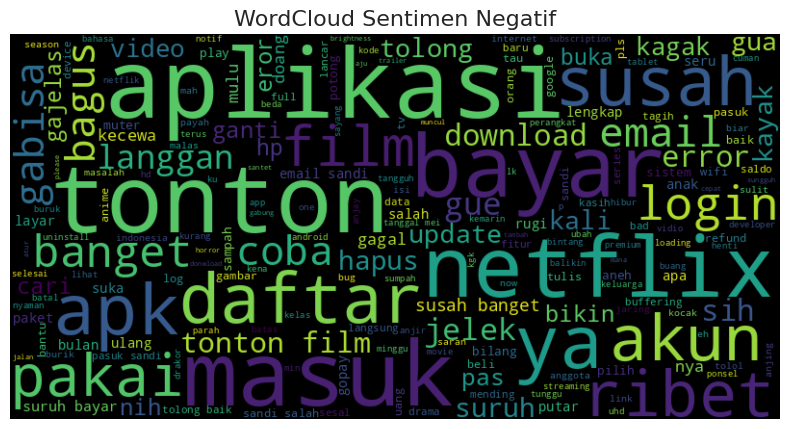

In [ ]:
#membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

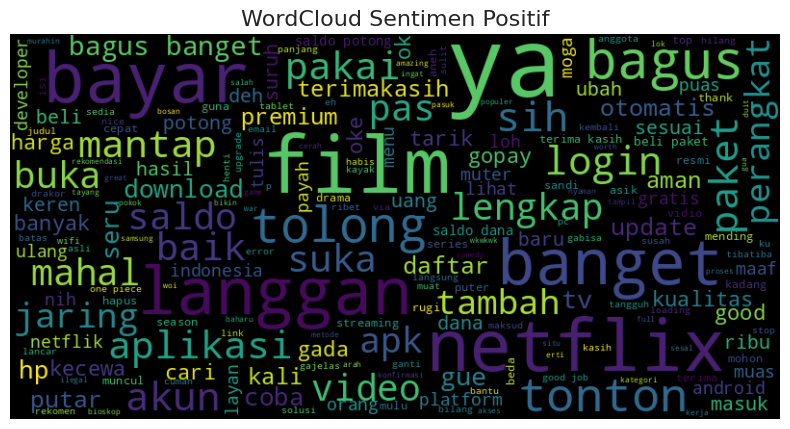

In [ ]:
#membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

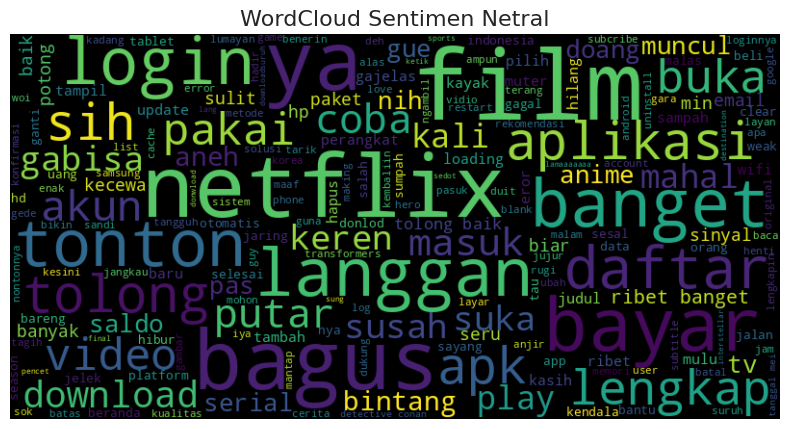

In [ ]:
#membuat WordCloud untuk sentimen netral
create_wordcloud(sentimen_netral, 'WordCloud Sentimen Netral')

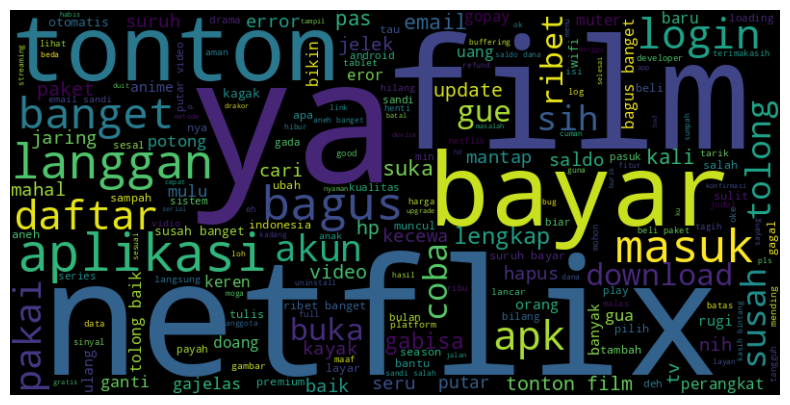

In [ ]:
#menggabungkan teks dalam kolom 'translated_steming_data' menjadi satu string
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

RATING

In [ ]:
import pandas as pd
data = pd.read_csv("Hasil_labeling_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      904 non-null    object
 1   score         904 non-null    int64 
 2   at            904 non-null    object
 3   content       904 non-null    object
 4   steming_data  904 non-null    object
 5   rating        904 non-null    int64 
 6   sentiment     904 non-null    object
dtypes: int64(2), object(5)
memory usage: 49.6+ KB


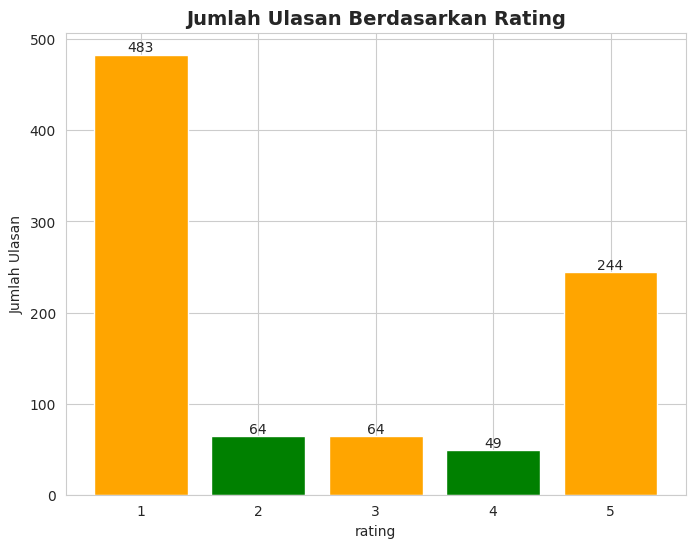

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['score'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['orange','green','orange','green','orange']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ulasan Berdasarkan Rating', fontsize=14, fontweight='bold')
plt.xlabel('rating')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rating_counts.index)

for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()